In [8]:
from LZGraphs import NDPLZGraph

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.notebook import tqdm
mpl.rcParams['figure.figsize'] = (15,7)
import numpy as np
sns.set_context('poster')

# Creating an LZGraph for a Repertoire

In [2]:
example_sequences = pd.read_csv('ExampleData2.csv',
                               index_col=0)
example_sequences

,cdr3_rearrangement,V,J
24735,TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC,TRBV30-1*01,TRBJ1-2*01
8790,TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT,TRBV19-1*01,TRBJ1-3*01
2956,TGTGCCAGCAGTTTCTCCCCCCCCTACGAGCAGTACTTC,TRBV27-1*01,TRBJ2-7*01
20041,TGCGCCAGCAGCTTGGCCGTGAACTACAACACCGGGGAGCTGTTTTTT,TRBV5-1*01,TRBJ2-2*01
3144,TGTGCCAGCAGCTCGCAGGGTCTCTCCTACGAGCAGTACTTC,TRBV7-9*01,TRBJ2-7*01
...,...,...,...
16997,TGTGCCAGCAGTTTAGCGGGACAGGCGGGTTACACTGAAGCTTTCTTT,TRBV28-1*01,TRBJ1-1*01
16636,TGTGCCAGCAGCTTAGGGACAGGGGTTCAACAGCCCCAGCATTTT,TRBV7-3*01,TRBJ1-5*01
8839,TGTGCCAGCGCCCGGACGGGGGGGGGTAACTATGGCTACACCTTC,TRBV25-1*01,TRBJ1-2*01
12247,TGCGCCAGCAGCCAACGGACAGGGCGCGAGCAGTACTTC,TRBV4-3*01,TRBJ2-7*01


In [3]:
my_ndp_lzgraph = NDPLZGraph(example_sequences)

Gene Information Loaded.. |  0.0  Seconds


0it [00:00, ?it/s]

Graph Constructed.. |  0.52  Seconds
Graph Metadata Derived.. |  0.52  Seconds
Individual Subpattern Empirical Probability Derived.. |  0.6  Seconds
Graph Edge Weight Normalized.. |  0.62  Seconds
Graph Edge Gene Weights Normalized.. |  0.72  Seconds
Terminal State Map Derived.. |  0.78  Seconds
Individual Subpattern Empirical Probability Derived.. |  0.95  Seconds
Terminal State Map Derived.. |  0.95  Seconds
LZGraph Created Successfully.. |  0.95  Seconds




# Deriving LZCentrality and K1000

In [4]:
from LZGraphs.Metrics import K1000_Diversity,LZCentrality

## LZCentrality

In [5]:
LZCentrality(my_ndp_lzgraph,'TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC')

14.105263157894736

<AxesSubplot:ylabel='Count'>

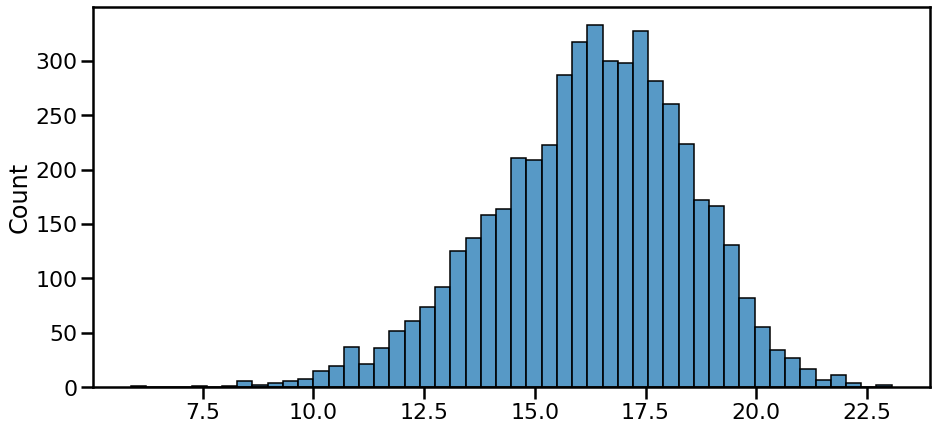

In [10]:
lz_centralities = [LZCentrality(my_ndp_lzgraph,seq) for seq in example_sequences.cdr3_rearrangement]
sns.histplot(lz_centralities)

# K1000 Diversity Index

In [12]:
sequences = example_sequences.cdr3_rearrangement.to_list() # or any list of CDR3 sequence
encoding_function = NDPLZGraph.encode_sequence
number_of_draws = 30 # deault value is 25

k1000_diversity = K1000_Diversity(sequences,encoding_function,draws=number_of_draws)

In [13]:
k1000_diversity

2140.1666666666665